In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

736

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ginir
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | blagoyevo
Processing Record 7 of Set 1 | copala
Processing Record 8 of Set 1 | sembe
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | broken hill
Proc

Processing Record 37 of Set 4 | kunming
Processing Record 38 of Set 4 | sayyan
Processing Record 39 of Set 4 | nantucket
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | petropavlovka
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | san andres del rabanedo
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | atar
Processing Record 46 of Set 4 | porosozero
Processing Record 47 of Set 4 | acarau
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | astoria
Processing Record 1 of Set 5 | praia
Processing Record 2 of Set 5 | khani
Processing Record 3 of Set 5 | sol-iletsk
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | umm kaddadah
Processing Record 7 of Set 5 | popondetta
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | sault sainte marie
Processing Record 10 of Set 5 | nguk

Processing Record 24 of Set 8 | pevek
Processing Record 25 of Set 8 | panjab
Processing Record 26 of Set 8 | piranhas
Processing Record 27 of Set 8 | yinchuan
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | redcliffe
Processing Record 30 of Set 8 | leningradskiy
Processing Record 31 of Set 8 | marcona
City not found. Skipping...
Processing Record 32 of Set 8 | alto araguaia
Processing Record 33 of Set 8 | fenyi
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | mopipi
Processing Record 36 of Set 8 | zyryanovskiy
City not found. Skipping...
Processing Record 37 of Set 8 | nieuwpoort
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | batticaloa
Processing Record 40 of Set 8 | mikumi
Processing Record 41 of Set 8 | marshall
Processing Record 42 of Set 8 | christchurch
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | westpunt
City not found. Skipping...
Processing Record 45 of Set 8 | is
City not found

Processing Record 10 of Set 12 | mahon
Processing Record 11 of Set 12 | sacramento
Processing Record 12 of Set 12 | port keats
Processing Record 13 of Set 12 | homer
Processing Record 14 of Set 12 | yangjiang
Processing Record 15 of Set 12 | lapua
Processing Record 16 of Set 12 | suhbaatar
Processing Record 17 of Set 12 | zaragoza
Processing Record 18 of Set 12 | esperance
Processing Record 19 of Set 12 | westport
Processing Record 20 of Set 12 | dauriya
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | carberry
Processing Record 23 of Set 12 | baykit
Processing Record 24 of Set 12 | plymouth
Processing Record 25 of Set 12 | embu-guacu
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | talakan
Processing Record 28 of Set 12 | high level
Processing Record 29 of Set 12 | pulivendla
Processing Record 30 of Set 12 | tshela
Processing Record 31 of Set 12 | turukhansk
Processing Record 32 of Set 12 | miri
Processing Recor

In [9]:
# tally the number of cities in the city_data array
len(city_data)

671

# Module 6.2.7

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,63.00,67,20,3.44,AR,2021-03-22 14:00:44
1,Ushuaia,-54.8000,-68.3000,53.60,66,40,12.66,AR,2021-03-22 14:00:10
2,Ginir,7.1333,40.7000,75.43,27,37,12.06,ET,2021-03-22 14:00:44
3,Busselton,-33.6500,115.3333,53.01,79,54,14.07,AU,2021-03-22 14:00:45
4,Blagoyevo,63.3667,47.9167,30.16,96,100,4.23,RU,2021-03-22 14:00:45
5,Copala,16.6500,-98.9833,77.00,70,93,1.88,MX,2021-03-22 14:00:45
6,Sembe,1.6481,14.5806,85.23,58,100,1.30,CG,2021-03-22 14:00:46
7,Mataura,-46.1927,168.8643,54.00,96,70,1.99,NZ,2021-03-22 14:00:46
8,Rikitea,-23.1203,-134.9692,79.65,71,0,6.22,PF,2021-03-22 14:00:47
9,Kruisfontein,-34.0033,24.7314,73.00,56,0,10.00,ZA,2021-03-22 14:00:47


In [11]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-03-22 14:00:44,-38.0023,-57.5575,63.00,67,20,3.44
1,Ushuaia,AR,2021-03-22 14:00:10,-54.8000,-68.3000,53.60,66,40,12.66
2,Ginir,ET,2021-03-22 14:00:44,7.1333,40.7000,75.43,27,37,12.06
3,Busselton,AU,2021-03-22 14:00:45,-33.6500,115.3333,53.01,79,54,14.07
4,Blagoyevo,RU,2021-03-22 14:00:45,63.3667,47.9167,30.16,96,100,4.23
...,...,...,...,...,...,...,...,...,...
666,Gonen,TR,2021-03-22 14:03:45,40.1049,27.6540,55.99,93,75,12.66
667,Oriximina,BR,2021-03-22 14:03:46,-1.7656,-55.8661,85.15,67,76,2.21
668,Qandala,SO,2021-03-22 14:03:46,11.4720,49.8728,82.99,47,13,4.54
669,San Policarpo,PH,2021-03-22 14:03:46,12.1791,125.5072,80.67,83,5,14.09


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Module 6.3.1

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616421826.858492

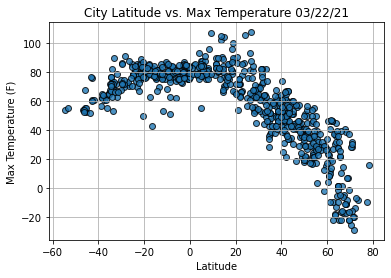

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

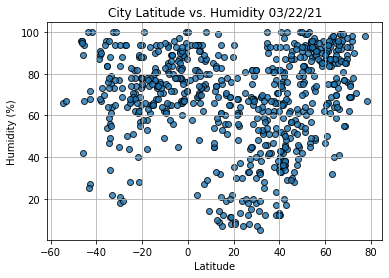

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

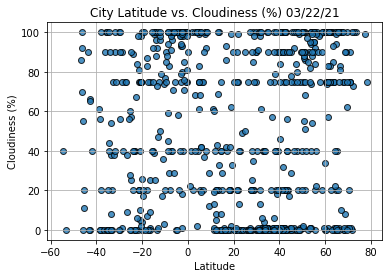

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

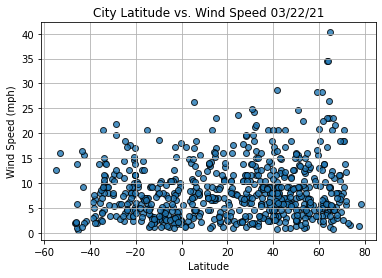

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [25]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2021-03-22 14:00:11
Lat                      -42.8794
Lng                       147.329
Max Temp                     60.8
Humidity                       72
Cloudiness                     66
Wind Speed                   9.22
Name: 13, dtype: object

In [29]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
666     True
667    False
668     True
669     True
670     True
Name: Lat, Length: 671, dtype: bool

In [30]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ginir,ET,2021-03-22 14:00:44,7.1333,40.7000,75.43,27,37,12.06
4,Blagoyevo,RU,2021-03-22 14:00:45,63.3667,47.9167,30.16,96,100,4.23
5,Copala,MX,2021-03-22 14:00:45,16.6500,-98.9833,77.00,70,93,1.88
6,Sembe,CG,2021-03-22 14:00:46,1.6481,14.5806,85.23,58,100,1.30
10,Cabo San Lucas,MX,2021-03-22 13:59:11,22.8909,-109.9124,66.99,37,40,2.30


In [31]:
# To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

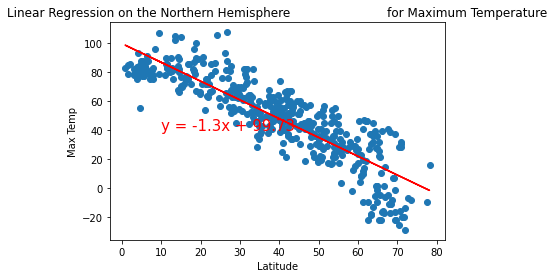

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

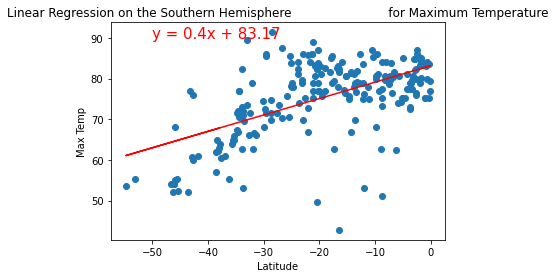

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

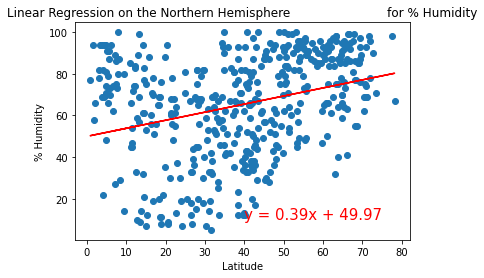

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

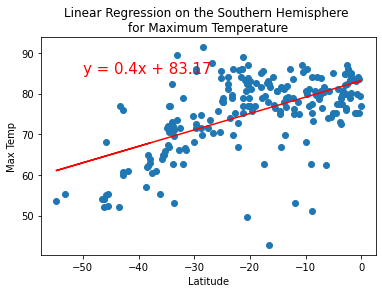

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

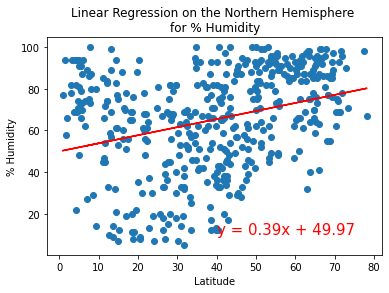

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

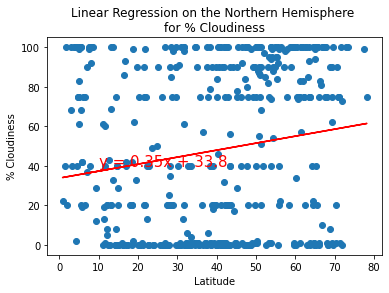

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

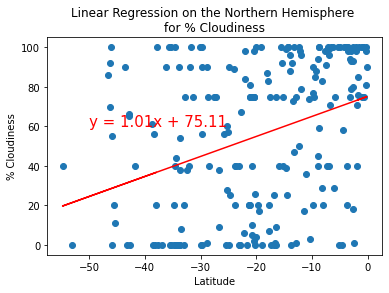

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

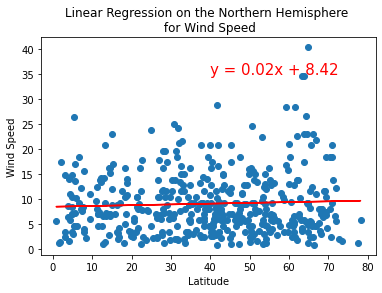

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

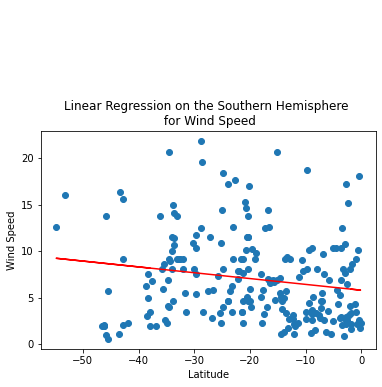

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))